In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
import matplotlib.pyplot as plt
one_layer_path = "/content/drive/MyDrive/one-layer-model"
image_path = "/content/drive/MyDrive/image-test/forest.jpg"
one_layer_logisreg_model= keras.models.load_model(one_layer_path)


In [3]:
one_layer_logisreg_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 dense (Dense)               (None, 550)               1690150   
                                                                 
 dropout (Dropout)           (None, 550)               0         
                                                                 
 batch_normalization (BatchN  (None, 550)              2200      
 ormalization)                                                   
                                                                 
 dense_1 (Dense)             (None, 100)               55100     
                                                                 
Total params: 1,747,450
Trainable params: 1,746,350
Non-trainable params: 1,100
__________________________________________

In [4]:
def load_image(filename):
    # load the image
    img = load_img(filename, target_size=(32, 32))
    # convert to array
    img = img_to_array(img)
    # reshape into a single sample with 3 channels
    img = img.reshape(1, 32, 32, 3)
    # prepare pixel data
    img = img.astype('float32')
    img = img / 255.0
    return img
def load_image_raw(filename):
    # load the image
    img = load_img(filename, target_size=(32, 32))
    img = img_to_array(img)
    # reshape into a single sample with 3 channels
    img = img.reshape( 32, 32, 3)
    img = img.astype('int32')
    return img

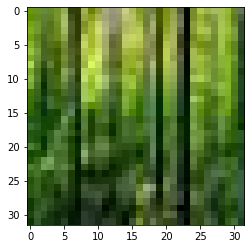

In [5]:
img_raw = load_image_raw(image_path)
plt.imshow(img_raw)

In [6]:
list_label = ['apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle', 'bicycle', 'bottle', 'bowl', 'boy', 'bridge', 'bus', 'butterfly', 'camel', 'can', 'castle', 'caterpillar', 'cattle', 'chair', 'chimpanzee', 'clock', 'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup', 'dinosaur', 'dolphin', 'elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster', 'house', 'kangaroo', 'keyboard', 'lamp', 'lawn_mower', 'leopard', 'lion', 'lizard', 'lobster', 'man', 'maple_tree', 'motorcycle', 'mountain', 'mouse', 'mushroom', 'oak_tree', 'orange', 'orchid', 'otter', 'palm_tree', 'pear', 'pickup_truck', 'pine_tree', 'plain', 'plate', 'poppy', 'porcupine', 'possum', 'rabbit', 'raccoon', 'ray', 'road', 'rocket', 'rose', 'sea', 'seal', 'shark', 'shrew', 'skunk', 'skyscraper', 'snail', 'snake', 'spider', 'squirrel', 'streetcar', 'sunflower', 'sweet_pepper', 'table', 'tank', 'telephone', 'television', 'tiger', 'tractor', 'train', 'trout', 'tulip', 'turtle', 'wardrobe', 'whale', 'willow_tree', 'wolf', 'woman', 'worm']


In [7]:
img = load_image(image_path)
print(type(img))
print(img)
result = one_layer_logisreg_model.predict(img)
res = result[0].tolist()
print(list_label[res.index(max(res))])


<class 'numpy.ndarray'>
[[[[0.4117647  0.6039216  0.01176471]
   [0.41568628 0.5686275  0.14901961]
   [0.4117647  0.5411765  0.23137255]
   ...
   [0.5921569  0.72156864 0.20784314]
   [0.4117647  0.5254902  0.17254902]
   [0.39215687 0.46666667 0.35686275]]

  [[0.36862746 0.56078434 0.        ]
   [0.3882353  0.5411765  0.12156863]
   [0.3764706  0.5019608  0.20392157]
   ...
   [0.5686275  0.69803923 0.1764706 ]
   [0.37254903 0.4862745  0.1254902 ]
   [0.28235295 0.36078432 0.2509804 ]]

  [[0.45490196 0.6431373  0.0627451 ]
   [0.4392157  0.5921569  0.17254902]
   [0.36078432 0.4862745  0.1882353 ]
   ...
   [0.58431375 0.7254902  0.2       ]
   [0.40784314 0.5294118  0.16470589]
   [0.20392157 0.28627452 0.16470589]]

  ...

  [[0.07058824 0.22352941 0.00784314]
   [0.18039216 0.3254902  0.12156863]
   [0.23137255 0.37254903 0.18431373]
   ...
   [0.12941177 0.2901961  0.03137255]
   [0.08235294 0.23921569 0.03137255]
   [0.1882353  0.33333334 0.21176471]]

  [[0.11372549 0.2627

In [8]:
train = "/content/drive/MyDrive/cifar100/train"
from keras.datasets.cifar import load_batch
import numpy as np


In [9]:

def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='latin1')
    return dict


In [10]:
train_data = unpickle(train)

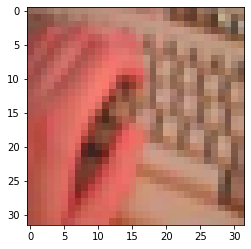

In [11]:
test_train_data=train_data['data'][101].reshape(3,32,32)
test_train_data = test_train_data.transpose(1,2,0)
plt.imshow(test_train_data)

In [12]:
test_data = train_data['data'][101].reshape(1,3,32,32)
test_data = test_data.transpose(0,2,3,1)
test_data = test_data.astype('float32')
test_data = test_data / 255.0

In [13]:
result2 = one_layer_logisreg_model.predict(test_data)
res2=result2[0].tolist()
print(list_label[res2.index(max(res2))])


1/1 [==============================] - 0s 19ms/step
hamster


Generating graph, this could take a moment...


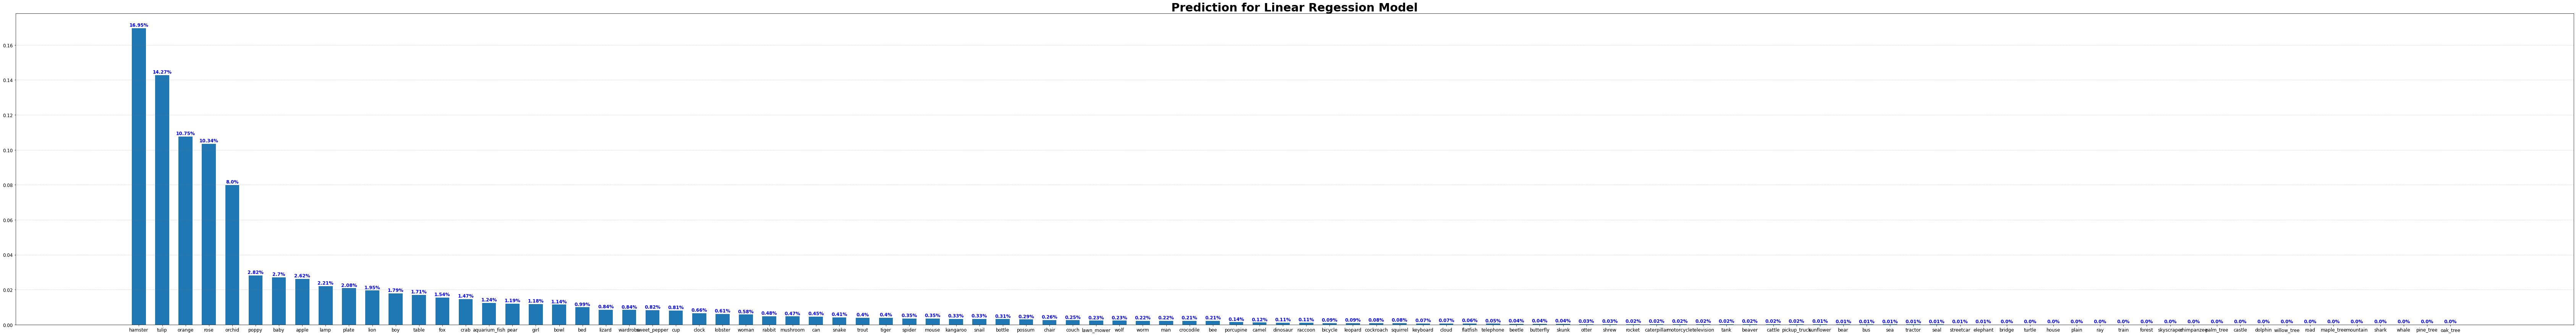

In [82]:
import numpy as np

list_label = ['apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle', 'bicycle', 'bottle', 'bowl', 'boy', 'bridge', 'bus', 'butterfly', 'camel', 'can', 'castle', 'caterpillar', 'cattle', 'chair', 'chimpanzee', 'clock', 'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup', 'dinosaur', 'dolphin', 'elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster', 'house', 'kangaroo', 'keyboard', 'lamp', 'lawn_mower', 'leopard', 'lion', 'lizard', 'lobster', 'man', 'maple_tree', 'motorcycle', 'mountain', 'mouse', 'mushroom', 'oak_tree', 'orange', 'orchid', 'otter', 'palm_tree', 'pear', 'pickup_truck', 'pine_tree', 'plain', 'plate', 'poppy', 'porcupine', 'possum', 'rabbit', 'raccoon', 'ray', 'road', 'rocket', 'rose', 'sea', 'seal', 'shark', 'shrew', 'skunk', 'skyscraper', 'snail', 'snake', 'spider', 'squirrel', 'streetcar', 'sunflower', 'sweet_pepper', 'table', 'tank', 'telephone', 'television', 'tiger', 'tractor', 'train', 'trout', 'tulip', 'turtle', 'wardrobe', 'whale', 'willow_tree', 'wolf', 'woman', 'worm']
res2_index = np.argsort(res2)
res2_sorted = np.array(res2)[np.array(res2_index)]
res2_sorted_rev = res2_sorted[::-1];
label_sorted = np.array(list_label)[np.array(res2_index)]
label_sorted_rev = label_sorted[::-1]
res2_sorted_beautify = np.around(res2_sorted * 100, 2)

def gen_graph(limit = 100, mul = 1):

  limit = np.clip(limit, 1, 100)

  limit_ratio = 100 / limit
  font_size = int(12 * mul * limit_ratio)
  bar_width = .6
  figure_size = (int(120 * mul), int(15 * mul * np.clip(limit_ratio, 1, 10)))
  height_deviation = .002 * (mul / 2)
  line_size = (mul * limit_ratio) / 2

  print("Generating graph, this could take a moment...")

  plt.rc('font', size=font_size)
  fig = plt.figure(figsize=figure_size)
  ax = fig.add_subplot()
  bars = ax.bar(label_sorted_rev[:limit], res2_sorted_rev[:limit], width=bar_width)
  ax.set_title('Prediction for Linear Regession Model', size=font_size * 2.5, weight='bold')
  for i, v in enumerate(res2_sorted_rev[:limit]):
      ax.text(i, v + height_deviation, str(np.around(v * 100, 2)) + "%", color='blue', fontweight='bold', ha = 'center')

  plt.grid(axis='y', color='gray', linestyle='--', linewidth=line_size, alpha=.6)
  plt.show()

# The graphing function
gen_graph()